#  Resume Shortlisting using NLP

## Problem Definition
We aim to automatically evaluate resumes against job descriptions and assign a score (1–5) indicating how well a resume matches the job requirements.

In [14]:
import pandas as pd 
import re
import string
from sklearn.metrics import accuracy_score


In [15]:
df=pd.read_csv("resume_job_dataset_adjusted_v2.csv")

In [16]:
df.shape

(10000, 3)

## This is how our dataset is"

In [17]:
df.head()

,job_description,resume,match_score
0,"Data Analyst needed with experience in SQL, Ex...","Experienced professional skilled in sql, excel...",4
1,Data Scientist needed with experience in Stati...,Experienced professional skilled in statistics...,4
2,Software Engineer needed with experience in Sy...,Experienced professional skilled in system des...,5
3,"ML Engineer needed with experience in Python, ...","Experienced professional skilled in python, co...",4
4,Software Engineer needed with experience in RE...,"Experienced professional skilled in rest apis,...",5


# bar plots

In [18]:
dff=pd.read_csv("skills_extracted_combined.csv")
l6=list(dff["resume_skills"])
l7=list(dff["job_skills"])

In [19]:
import ast
l7 = [ast.literal_eval(x) if isinstance(x, str) else x for x in l7]
l6=  [ast.literal_eval(x) if isinstance(x, str) else x for x in l6]

In [20]:
all_resume_skills=[]
all_job_skills=[]

In [21]:
for i in l6 :
    for k in i :
       all_resume_skills.append(k)

In [22]:
for i in l7 :
    for k in i :
       all_job_skills.append(k)

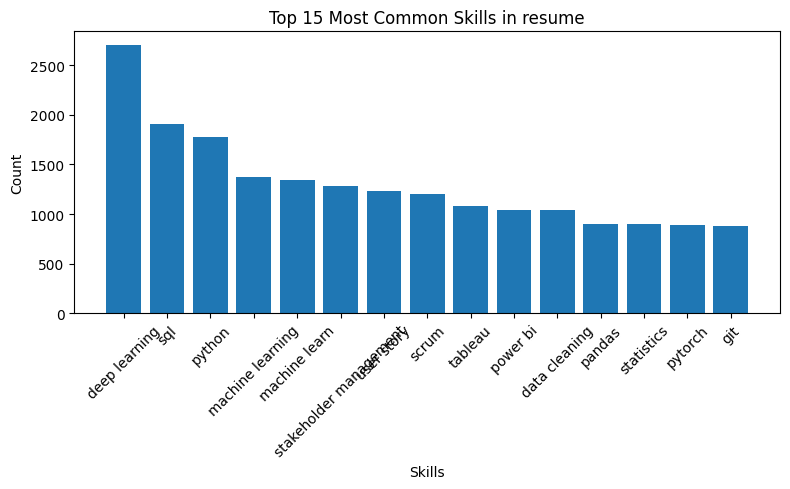

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

skill_counts = Counter(all_resume_skills)

# Get top 5 most common skills
top_5 = skill_counts.most_common(15)
skills, counts = zip(*top_5)

plt.figure(figsize=(8, 5))
plt.bar(skills, counts)
plt.title("Top 15 Most Common Skills in resume")
plt.xlabel("Skills")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


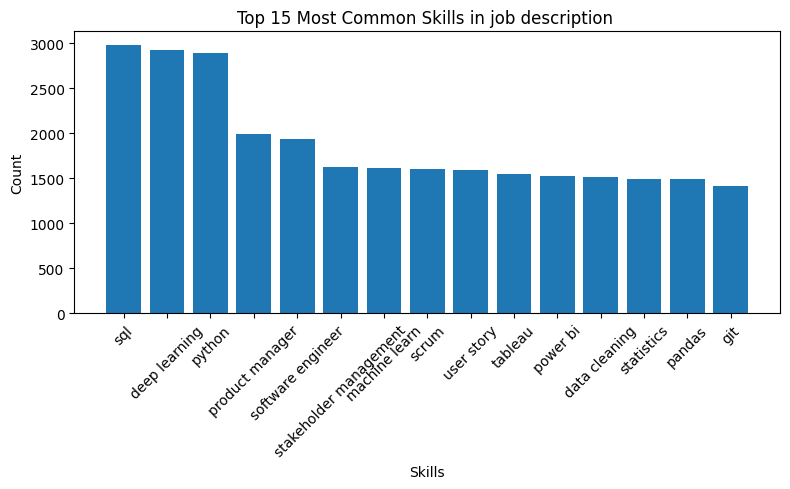

In [24]:
skill_counts = Counter(all_job_skills)

# Get top 5 most common skills
top_5 = skill_counts.most_common(15)
skills, counts = zip(*top_5)

plt.figure(figsize=(8, 5))
plt.bar(skills, counts)
plt.title("Top 15 Most Common Skills in job description ")
plt.xlabel("Skills")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Text Cleaning Function
The `clean_text(df)` function converts all text in job descriptions and resumes to lowercase, removes punctuation, and replaces multiple spaces or newlines with a single space. This ensures the text data is clean and uniform for further processing.


In [25]:
def clean_text(df):
    #extracting job descriptions and resumes from dataframe
    job_desc=df["job_description"]
    resume=df["resume"]
    
    #converting all text to lowercase 
    job_desc_lower=[t.lower() for t in job_desc]
    resume_lower=[t.lower() for t in resume]

    #removing punctuation by replacing it with spaces
    pattern = r'[{}]'.format(re.escape(string.punctuation))
    job_desc_clean = [re.sub(pattern, ' ', t) for t in job_desc_lower]
    resume_clean   = [re.sub(pattern, ' ', t) for t in resume_lower]

    #replacing  multiple spaces/tabs/newlines with a single space and trim ends
    pattern=r'\s+'
    job_desc_clean = [re.sub(pattern, ' ', t).strip() for t in job_desc_clean]
    resume_clean   = [re.sub(pattern, ' ', t).strip() for t in resume_clean]

    df["job_description"]=job_desc_clean
    df["resume"]=resume_clean
    return df 

## We are implementing clean text function on df

In [26]:
df=clean_text(df)

### Tokenization and Stopword Removal
The `tokenize_and_remove_stopwords(df)` function tokenizes job descriptions and resumes into individual words, removes English stopwords, and keeps only alphabetic tokens. This step helps focus on meaningful words for text analysis or model training.


In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

import nltk
nltk.download("punkt")
nltk.download("punkt_tab")   
nltk.download("stopwords")
nltk.download("wordnet")

def tokenize_and_remove_stopwords(df):

    job_desc=df["job_description"]
    resume=df["resume"]
  
  
    tokens_job_desc = [word_tokenize(t) for t in job_desc]
    tokens_resume   = [word_tokenize(t) for t in resume]

    # load English stopwords
    stop_words = set(stopwords.words("english"))

    # filter out stopwords + keep only alphabetic tokens
    filtered_job_desc = [[w for w in tokens if w.isalpha() and w not in stop_words]
                         for tokens in tokens_job_desc]
    filtered_resume   = [[w for w in tokens if w.isalpha() and w not in stop_words]
                         for tokens in tokens_resume]

    return filtered_job_desc, filtered_resume

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Lemmatization of Tokens
The `lemmatize_tokens(job_tokens, resume_tokens)` function applies lemmatization to tokenized job descriptions and resumes, converting words to their base form. This reduces word variations and helps in consistent text analysis.


In [28]:
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(job_tokens, resume_tokens):
   
    lemmatized_job_desc = [[lemmatizer.lemmatize(w) for w in tokens]
                           for tokens in job_tokens]
    lemmatized_resume   = [[lemmatizer.lemmatize(w) for w in tokens]
                           for tokens in resume_tokens]
    
    return lemmatized_job_desc, lemmatized_resume

In [29]:
l1,l2=tokenize_and_remove_stopwords(df)

In [30]:
l3,l4=lemmatize_tokens(l1,l2)


### Word Cloud Visualization
This code generates a word cloud from a tokenized list of words (`l3`). It flattens the list, counts word frequencies, selects the top 50 words, and visualizes them with a WordCloud for easy insight into the most common terms.


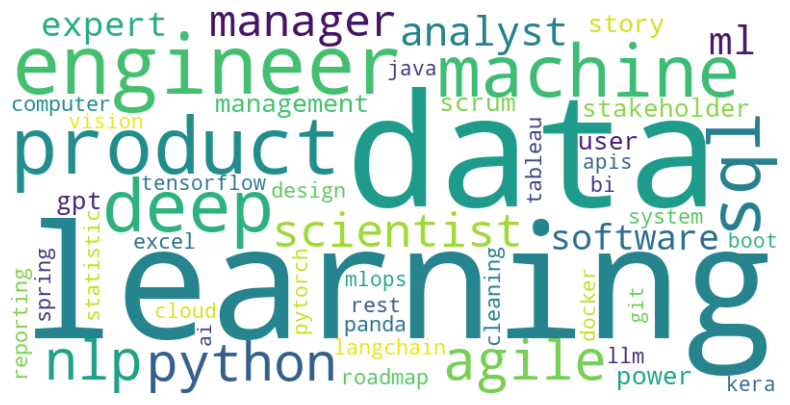

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


#  Flatten the 2D list
all_words = [word for sublist in l3 for word in sublist]

# Remove unwanted words
exclude_words = {"experience","required","needed"}
filtered_words = [w for w in all_words if w not in exclude_words]

# Count word frequencies
word_freq = Counter(filtered_words)

# Select top 50 most common words
top_50 = dict(word_freq.most_common(50))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      max_words=50).generate_from_frequencies(top_50)

#  Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Word Cloud for Tokenized Text
This code creates a word cloud from the tokenized list `l4`. It counts word frequencies, selects the top 50 words, and visualizes them using WordCloud to highlight the most common terms in the text data.


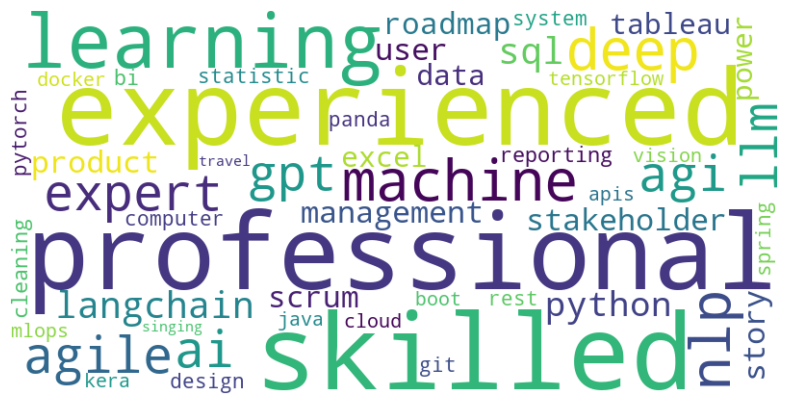

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

all_words = [word for sublist in l4 for word in sublist]

filtered_words = [w for w in all_words if w not in exclude_words]


word_freq = Counter(filtered_words)
top_50 = dict(word_freq.most_common(50))


wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis',
                      max_words=50).generate_from_frequencies(top_50)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [33]:
features_df=pd.DataFrame()

In [34]:
resume_texts = [" ".join(r) for r in l3]
job_texts    = [" ".join(j) for j in  l4]


### TF-IDF Cosine Similarity
This code computes the similarity between resumes and job descriptions using TF-IDF vectorization. Each resume and job description pair is transformed into TF-IDF vectors, and the row-wise cosine similarity is calculated to measure how closely they match.


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

vectorizer = TfidfVectorizer()
combined = resume_texts + job_texts
tfidf_matrix = vectorizer.fit_transform(combined)
n = len(df)

resume_tfidf = tfidf_matrix[:n]
job_tfidf    = tfidf_matrix[n:]

# row-wise cosine similarity
tfidf_cosine = [
    float(cosine_similarity(resume_tfidf[i], job_tfidf[i])[0][0])
    for i in range(n)
]

### Jaccard Similarity
This code computes the Jaccard similarity between tokenized resumes (`l3`) and job descriptions (`l4`). Each text is converted to a set of words, and the similarity is calculated as the size of the intersection divided by the size of the union for each resume–job pair.


In [36]:
resume_sets = [set(r) for r in l3]
job_sets    = [set(j) for j in l4]

# Define Jaccard similarity
def jaccard_sim(a, b):
    return len(a & b) / len(a | b) if len(a | b) > 0 else 0

# Compute Jaccard for each pair
jaccard = [jaccard_sim(a, b) for a, b in zip(resume_sets, job_sets)]

### Sentence-BERT Cosine Similarity
This code uses the `all-MiniLM-L6-v2` SentenceTransformer model to compute semantic similarity between resumes and job descriptions. It encodes each text into embeddings and calculates cosine similarity for corresponding resume–job pairs to capture meaning-based matches.


In [37]:
from sentence_transformers import SentenceTransformer, util

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode both lists
emb_r = model.encode(resume_texts, convert_to_tensor=True)
emb_l = model.encode(job_texts, convert_to_tensor=True)

# Compute similarity only for corresponding pairs
pairwise_similarities = [
    util.cos_sim(emb_r[i], emb_l[i]).item()
    for i in range(min(len(resume_texts), len(job_texts)))
]


## we made the new data frame using the new features we find using the prev function 


In [38]:
features_df = pd.DataFrame({
    "tfidf_cosine": tfidf_cosine,
    "jaccard": jaccard,
    "bert_sim": pairwise_similarities
})

In [39]:
features_df.head()

,tfidf_cosine,jaccard,bert_sim
0,0.431254,0.370370,0.767331
1,0.281845,0.228571,0.695526
2,0.955648,0.714286,0.960671
3,0.350338,0.225806,0.745145
4,0.958610,0.750000,0.924972


### Skill Overlap Features
The `skill_features` function computes row-wise skill-based features between tokenized resumes (`l3`) and job descriptions (`l4`). It calculates the number of overlapping skills, the percentage of required skills present, and the count of missing skills for each resume–job pair.


In [40]:
def skill_features(resume_tokens, job_tokens):
    rset = set(resume_tokens or [])
    jset = set(job_tokens or [])

    overlap = rset & jset
    overlap_count = len(overlap)

    job_count = len(jset)
    percent_required_present = overlap_count / job_count if job_count > 0 else 0.0

    missing_skill_count = job_count - overlap_count

    return overlap_count, percent_required_present, missing_skill_count

# Compute row-wise features
rows = [skill_features(r, j) for r, j in zip(l3, l4)]

# Unpack results into existing features_df
features_df[["overlap_count", "percent_required_present", "missing_skill_count"]] = pd.DataFrame(
    rows, index=features_df.index
)


In [41]:
features_df.head()

,tfidf_cosine,jaccard,bert_sim,overlap_count,percent_required_present,missing_skill_count
0,0.431254,0.370370,0.767331,10,0.769231,3
1,0.281845,0.228571,0.695526,8,0.727273,3
2,0.955648,0.714286,0.960671,20,0.869565,3
3,0.350338,0.225806,0.745145,7,0.700000,3
4,0.958610,0.750000,0.924972,24,0.888889,3


### Structural Text Features
This code extracts structural features from tokenized resumes (`l3`) and job descriptions (`l4`). Features include the lengths of resumes and jobs, the overlap ratio of unique tokens, and the difference in token counts, which are added to `features_df` for further analysis.


In [42]:
# Structural features
resume_length = [len(r) for r in l3]
job_length    = [len(j) for j in l4]

# Overlap ratio (set-based)
overlap_ratio = [
    len(set(r) & set(j)) / len(set(r) | set(j)) if len(set(r) | set(j)) > 0 else 0
    for r, j in zip(l3, l4)
]
# Difference in token counts
token_count_diff = [abs(len(r) - len(j)) for r, j in zip(l3, l4)]

# Insert into existing features_df
features_df[["resume_length", "job_length", "overlap_ratio", "token_count_diff"]] = pd.DataFrame({
    "resume_length": resume_length,
    "job_length": job_length,
    "overlap_ratio": overlap_ratio,
    "token_count_diff": token_count_diff
}, index=features_df.index)




In [43]:
features_df.head()

,tfidf_cosine,jaccard,bert_sim,overlap_count,percent_required_present,missing_skill_count,resume_length,job_length,overlap_ratio,token_count_diff
0,0.431254,0.370370,0.767331,10,0.769231,3,25,13,0.370370,12
1,0.281845,0.228571,0.695526,8,0.727273,3,34,11,0.228571,23
2,0.955648,0.714286,0.960671,20,0.869565,3,25,23,0.714286,2
3,0.350338,0.225806,0.745145,7,0.700000,3,29,10,0.225806,19
4,0.958610,0.750000,0.924972,24,0.888889,3,29,27,0.750000,2


### Machine Learning Model Implementation
In this section, we use the extracted textual and structural features to build and train a machine learning model. The model will learn to predict similarity or match between resumes and job descriptions based on these features.


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()

In [46]:
features_dff=scaler.fit_transform(features_df)

In [47]:
features_dff=pd.DataFrame(features_dff,columns=features_df.columns)

In [48]:
features_dff["match_score"]=df["match_score"]

In [49]:
features_df=features_dff

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X=features_df.iloc[:,0:-1]

In [52]:
y=features_df.iloc[:,-1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### RIDGE REGRESSION 

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, confusion_matrix
import numpy as np
# parameter grid for alpha (regularization strength)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# 5-fold CV (change n_splits if you want)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=0, return_train_score=False)
grid.fit(X_train, y_train)

best_ridge = grid.best_estimator_
print("Best alpha:", grid.best_params_['alpha'])

feature_cols = X_train.columns.tolist()

y_pred_cont = best_ridge.predict(X_test)
y_pred_round = np.clip(np.round(y_pred_cont), int(np.min(y_train)), int(np.max(y_train))).astype(int)

print("Ridge Test MAE:", mean_absolute_error(y_test, y_pred_round))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_round))


acc = accuracy_score(y_test, y_pred_round)
print("Ridge Test Accuracy:", acc)

Best alpha: 0.001
Ridge Test MAE: 0.15484848484848485
Confusion Matrix:
 [[ 99  29   0   0   0]
 [ 11 614   6   0   0]
 [  0  25 611 114   0]
 [  0   0 125 732 165]
 [  0   0   0  36 733]]
Ridge Test Accuracy: 0.8451515151515151


### Logistic

In [55]:
from mord import LogisticIT

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# base estimator
ord_log = LogisticIT()

grid = GridSearchCV(
    estimator=ord_log,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=cv,
    n_jobs=-1,
    verbose=0,
    return_train_score=False
)

grid.fit(X_train, y_train)

best_ord = grid.best_estimator_
print("Best alpha:", grid.best_params_['alpha'])


y_pred = best_ord.predict(X_test)

print("Ordinal Logistic Test MAE:", mean_absolute_error(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_cols = X_train.columns.tolist()
acc = accuracy_score(y_test, y_pred)
print("logistic Test Accuracy:", acc)


Best alpha: 0.0001
Ordinal Logistic Test MAE: 0.15242424242424243
Confusion Matrix:
 [[100  28   0   0   0]
 [ 12 613   6   0   0]
 [  0  23 612 115   0]
 [  0   0 118 759 145]
 [  0   0   0  56 713]]
logistic Test Accuracy: 0.8475757575757575


### Support Vector Regression (SVR) Model

In [56]:
from sklearn.svm import SVR

param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale','auto']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
svr = SVR()
grid = GridSearchCV(svr, param_grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, verbose=0)
grid.fit(X_train, y_train)

best = grid.best_estimator_
print("Best params:", grid.best_params_)

y_pred_cont = best.predict(X_test)
y_pred_round = np.clip(np.round(y_pred_cont), 1, 5).astype(int)

print("SVR Test MAE:", mean_absolute_error(y_test, y_pred_round))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_round))

feature_cols = X_train.columns.tolist()

acc = accuracy_score(y_test, y_pred_round)
print("SVR Test Accuracy:", acc)

Best params: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
SVR Test MAE: 0.11212121212121212
Confusion Matrix:
 [[127   1   0   0   0]
 [  0 624   7   0   0]
 [  0  20 667  63   0]
 [  0   0 106 763 153]
 [  0   0   0  20 749]]
SVR Test Accuracy: 0.8878787878787879
